# Sympy - Symbolic Algebra in Python

In [2]:
import sympy as sy
sy.init_printing()

## Introduction

There are two notable Computer Algebra Systems (CAS) for Python:

* [SymPy](http://sympy.org/en/index.html) - A python module that can be used in any Python program, or in an IPython session, that provides powerful CAS features. 
* [Sage](http://www.sagemath.org/) - Sage is a full-featured and very powerful CAS enviroment that aims to provide an open source system that competes with Mathematica and Maple. Sage is not a regular Python module, but rather a CAS environment that uses Python as its programming language.

Sage is in some aspects more powerful than SymPy, but both offer very comprehensive CAS functionality. The advantage of SymPy is that it is a regular Python module and integrates well with the IPython notebook. 

In this lecture we will therefore look at how to use SymPy with IPython notebooks. If you are interested in an open source CAS environment I also recommend to read more about Sage.

To get started using SymPy in a Python program or notebook, import the module `sympy`:

## Symbolic variables & Expressions

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the `Symbol` class:

In [3]:
x = sy.symbols('x')

In [4]:
# several symbols defined in one statement
x,y,z = sy.symbols('x, y, z')

In [5]:
# define two symbols relating to physical quantities
a, m = sy.symbols('acceleration mass')

In [9]:
# Newton's Law
F = m * a

In [10]:
# define a sequence
a,b,c,d = sy.symbols('a:d')

In [11]:
# quadratic equation
y = a*x**2+b*x+c
y

In [12]:
# alpha-numeric sequence
a1,a2,a3,a4 = sy.symbols('a1:5')

In [13]:
print (a1)

a1


In [14]:
# Greek symbols 
alpha, beta = sy.symbols('\\alpha \\beta')
alpha,beta

### Exercise
Write this function in Sympy
$$
    g(x) = \dfrac{1}{\sigma\sqrt{2\pi}}\,e^{-\dfrac{1}{2}\left(\dfrac{x-\mu}{\sigma}\right)^2}
    $$

In [44]:
sy.Rational(3,4)*sy.log(x**2-7)

In [45]:
3/4*sy.log(x**2-7)

We can add assumptions to symbols when we create them:

In [16]:
x = sy.Symbol('x', real=True)

In [17]:
x.is_imaginary

False

In [18]:
x = sy.Symbol('x', positive=True)

In [19]:
x > 0

In [20]:
sy.exp(x)

In [22]:
import numpy as np
np.exp(x)

AttributeError: 'Symbol' object has no attribute 'exp'

### Complex numbers

The imaginary unit is denoted `I` in Sympy. 

In [23]:
1+1*sy.I

In [24]:
sy.I**2

In [25]:
(x * sy.I + 1)**2

### Rational numbers

There are three different numerical types in SymPy: `Real`, `Rational`, `Integer`: 

In [120]:
r1 = sy.Rational(4,5)
r2 = sy.Rational(5,4)

In [121]:
r1, r2

In [122]:
r1+r2

In [123]:
r1/r2

### Evaluating Expressions

### Numerical evaluation

SymPy uses a library for artitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [109]:
sy.pi.evalf(n=50)

In [26]:
y = (x + sy.pi)**2

In [27]:
sy.N(y, 5) # same as evalf - it exapnds pi

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [28]:
y.subs(x, 1.5)

In [29]:
sy.N(y.subs(x, 1.5))

The `subs` function can of course also be used to substitute Symbols and expressions:

In [115]:
y.subs(x, a+sy.pi)

We can also combine numerical evolution of expressions with NumPy arrays:

In [31]:
import numpy
import numpy as np

In [32]:
x_vec = np.arange(0, 10, 0.1)

In [35]:
y_vec = np.array([sy.N(((x + sy.pi)**2).subs(x, xx)) for xx in x_vec])

In [37]:
print(y_vec)

[9.86960440108936 10.5079229318073 11.1662414625253 11.8445599932432
 12.5428785239612 13.2611970546792 13.9995155853971 14.7578341161151
 15.5361526468330 16.3344711775510 17.1527897082689 17.9911082389869
 18.8494267697049 19.7277453004228 20.6260638311408 21.5443823618587
 22.4827008925767 23.4410194232947 24.4193379540126 25.4176564847306
 26.4359750154485 27.4742935461665 28.5326120768845 29.6109306076024
 30.7092491383204 31.8275676690383 32.9658861997563 34.1242047304742
 35.3025232611922 36.5008417919102 37.7191603226281 38.9574788533461
 40.2157973840640 41.4941159147820 42.7924344455000 44.1107529762179
 45.4490715069359 46.8073900376538 48.1857085683718 49.5840270990898
 51.0023456298077 52.4406641605257 53.8989826912436 55.3773012219616
 56.8756197526795 58.3939382833975 59.9322568141155 61.4905753448334
 63.0688938755514 64.6672124062693 66.2855309369873 67.9238494677053
 69.5821679984232 71.2604865291412 72.9588050598591 74.6771235905771
 76.4154421212951 78.1737606520130

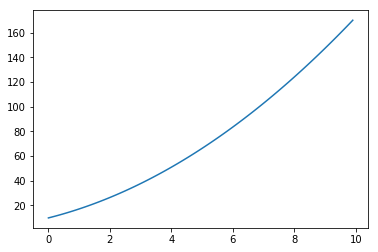

In [42]:
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_vec, y_vec);

However, this kind of numerical evolution can be very slow, and there is a much more efficient way to do it: Use the function `lambdify` to "compile" a Sympy expression into a function that is much more efficient to evaluate numerically:

In [46]:
f = sy.lambdify([x], (x + sy.pi)**2, 'numpy')  # the first argument is a list of variables that f will be a function of: in this case only x -> f(x)

In [48]:
y_vec = f(x_vec)  # now we can directly pass a numpy array and f(x) is efficiently evaluated

In [49]:
print(y_vec)

[  9.8696044   10.50792293  11.16624146  11.84455999  12.54287852
  13.26119705  13.99951559  14.75783412  15.53615265  16.33447118
  17.15278971  17.99110824  18.84942677  19.7277453   20.62606383
  21.54438236  22.48270089  23.44101942  24.41933795  25.41765648
  26.43597502  27.47429355  28.53261208  29.61093061  30.70924914
  31.82756767  32.9658862   34.12420473  35.30252326  36.50084179
  37.71916032  38.95747885  40.21579738  41.49411591  42.79243445
  44.11075298  45.44907151  46.80739004  48.18570857  49.5840271
  51.00234563  52.44066416  53.89898269  55.37730122  56.87561975
  58.39393828  59.93225681  61.49057534  63.06889388  64.66721241
  66.28553094  67.92384947  69.582168    71.26048653  72.95880506
  74.67712359  76.41544212  78.17376065  79.95207918  81.75039771
  83.56871624  85.40703477  87.26535331  89.14367184  91.04199037
  92.9603089   94.89862743  96.85694596  98.83526449 100.83358302
 102.85190155 104.89022008 106.94853861 109.02685714 111.12517567
 113.243494

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [51]:
%%timeit

y_vec = numpy.array([sy.N(((x + sy.pi)**2).subs(x, xx)) for xx in x_vec])

18.6 ms ± 252 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [52]:
%%timeit

y_vec = f(x_vec)

1.71 µs ± 8.76 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Algebraic manipulations

One of the main uses of an CAS is to perform algebraic manipulations of expressions. For example, we might want to expand a product, factor an expression, or simply an expression. The functions for doing these basic operations in SymPy are demonstrated in this section.

### Expand and factor

The first steps in an algebraic manipulation 

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument:

In [54]:
sy.expand((a+b)**2)

In [55]:
sy.expand((a+b)**5)

In [59]:
sy.expand((sy.pi - x)**2)

In [50]:
(x+1)*(x+2)*(x+3)

In [52]:
sy.expand((x+1)*(x+2)*(x+3))

In [57]:
sy.sin(a+b)

In [55]:
sy.expand(sy.sin(a+b), trig=True)

See `help(expand)` for a detailed explanation of the various types of expansions the `expand` functions can perform.

The opposite a product expansion is of course factoring. The factor an expression in SymPy use the `factor` function: 

In [58]:
sy.factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplify

The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [59]:
# simplify expands a product
sy.simplify((x+1)*(x+2)*(x+3)/(x+3))

In [60]:
g = sy.expand((x+1)*(x+2))
g

In [61]:
sy.simplify(g/(x+2))

In [62]:
sy.cancel(g/(x+2))

In [63]:
# simplify uses trigonometric identities
sy.simplify(sy.sin(a)**2 + sy.cos(a)**2)

In [64]:
sy.simplify(sy.cos(x)/sy.sin(x))

In [65]:
 sy.simplify(2*sy.sin(x)*sy.cos(x))

## apart and together

To manipulate symbolic expressions of fractions, we can the `apart` and `together` functions:

In [124]:
f1 = 1/((a+1)*(a+2))

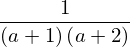

In [125]:
f1

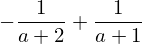

In [127]:
sy.apart(f1)

In [66]:
f2 = 1/(a+2) + 1/(a+3)

In [67]:
f2

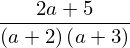

In [68]:
sy.together(f2)

Simplify usually combines fractions but does not factor: 

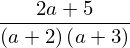

In [69]:
sy.simplify(f2)

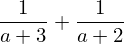

In [70]:
sy.expand(f2)

## Calculus

In addition to algebraic manipulations, the other main use of CAS is to do calculus, like derivatives and integrals of algebraic expressions.

### Differentiation

Differentiation is usually simple. Use the `diff` function. The first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative:

In [71]:
y

In [72]:
sy.diff(y**2, x)

For higher order derivatives we can do:

In [73]:
sy.diff(y**2, x, x)

In [74]:
sy.diff(y**2, x, 2) # same as above

To calculate the derivative of a multivariate expression, we can do:

In [75]:
x, y, z = sy.symbols("x,y,z")

In [76]:
f = sy.sin(x*y) + sy.cos(y*z)

Compute this derivative: $\frac{d^3f}{dxdy^2}$

In [77]:
sy.diff(f, x, 1, y, 2)

### Integration

Integration is done in a similar fashion:

In [78]:
f

In [79]:
sy.integrate(f, x)

By providing limits for the integration variable we can evaluate definite integrals: $\int_{-1}^1f\,dx$

In [81]:
sy.integrate(f, (x, -1, 1))

and also improper integrals

In [84]:
sy.integrate(sy.exp(-x**2), (x, -sy.oo, sy.oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

We can evaluate sums and products using the functions: 'Sum'

In [85]:
i = sy.symbols("i")

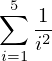

In [86]:
sy.Sum(1/i**2, (i, 1, 5))

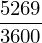

In [87]:
sy.summation(1/i**2, (i, 1, 5))

In [88]:
(sy.Sum(1/i**2, (i, 1, 5))).evalf()

In [89]:
sy.Sum(1/i**2, (i, 1, sy.oo))

In [90]:
sy.summation(1/i**2, (i, 1, sy.oo))

In [91]:
sy.Sum(1/i**2, (i, 1, sy.oo)).evalf()

Products work much the same way:

In [92]:
sy.Product(i, (i, 4, 15))

In [93]:
sy.Product(i, (i, 4, 15)).evalf()

In [94]:
sy.product(i, (i, 4, 15))

### Limits

Limits can be evaluated using the `limit` function. For example, 

In [95]:
sy.limit(sy.sin(x)/x, x, 0)

We can use 'limit' to check the result of derivation using the `diff` function:

In [96]:
f

In [97]:
sy.diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [98]:
h = sy.Symbol("h")

In [99]:
sy.limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

We can change the direction from which we approach the limiting point using the `dir` keywork argument:

In [100]:
sy.limit(1/x, x, 0, dir="+")

In [101]:
sy.limit(1/x, x, 0, dir="-")

### Series

Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

In [102]:
sy.series(sy.exp(x), x)

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

In [103]:
sy.series(sy.exp(x), x, 1)

And we can explicitly define to which order the series expansion should be carried out:

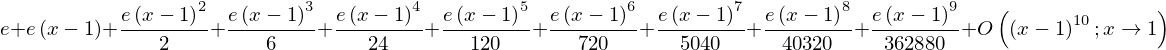

In [104]:
sy.series(sy.exp(x), x, 1, 10)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different order:

In [105]:
s1 = sy.cos(x).series(x, 0, 5)
s1

In [106]:
s2 = sy.sin(x).series(x, 0, 2)
s2

In [107]:
sy.expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

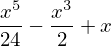

In [158]:
sy.expand(s1.removeO() * s2.removeO())

But note that this is not the correct expansion of $\cos(x)\sin(x)$ to $5$th order:

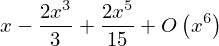

In [159]:
(sy.cos(x)*sy.sin(x)).series(x, 0, 6)

## Linear algebra

### Matrices

Matrices are defined using the `Matrix` class:

In [108]:
m11, m12, m21, m22 = sy.symbols("m11, m12, m21, m22")
b1, b2 = sy.symbols("b1, b2")

In [109]:
A = sy.Matrix([[m11, m12],[m21, m22]])
A

In [110]:
b = sy.Matrix([[b1], [b2]])
b

With `Matrix` class instances we can do the usual matrix algebra operations:

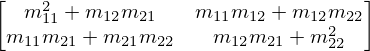

In [111]:
A**2

In [112]:
A * b

And calculate determinants and inverses, and the like:

In [113]:
A.det()

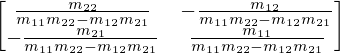

In [114]:
A.inv()

## Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [115]:
sy.solve(x**2 - 1, x)

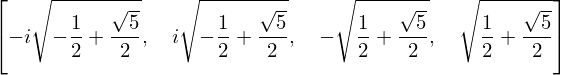

In [116]:
sy.solve(x**4 - x**2 - 1, x)

System of equations:

In [118]:
sy.solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

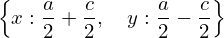

In [119]:
sy.solve([x + y - a, x - y - c], [x,y])

## Quantum mechanics: noncommuting variables

How about non-commuting symbols? In quantum mechanics we need to work with noncommuting operators, and SymPy has a nice support for noncommuting symbols and even a subpackage for quantum mechanics related calculations!

In [120]:
from sympy.physics.quantum import *

### States

We can define symbol states, kets and bras:

In [121]:
Ket('psi')

In [122]:
Bra('psi')

In [123]:
u = Ket('0')
d = Ket('1')

a, b = sy.symbols('alpha beta', complex=True)

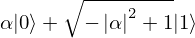

In [124]:
phi = a * u + sy.sqrt(1-abs(a)**2) * d; phi

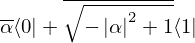

In [125]:
Dagger(phi)

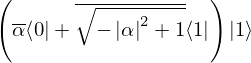

In [126]:
Dagger(phi) * d

Use `qapply` to distribute a mutiplication:

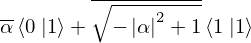

In [171]:
qapply(Dagger(phi) * d)

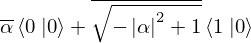

In [172]:
qapply(Dagger(phi) * u)

### Operators

In [173]:
A = Operator('A')
B = Operator('B')

Check if they are commuting!

In [174]:
A * B == B * A

False

In [176]:
sy.expand((A+B)**3)

In [177]:
c = Commutator(A,B)
c

We can use the `doit` method to evaluate the commutator:

In [178]:
c.doit()

We can mix quantum operators with C-numbers:

In [179]:
c = Commutator(a * A, b * B)
c

To expand the commutator, use the `expand` method with the `commutator=True` keyword argument:

In [180]:
c = Commutator(A+B, A*B)
c.expand(commutator=True)

In [181]:
Dagger(Commutator(A, B))

In [182]:
ac = AntiCommutator(A,B)

In [183]:
ac.doit()

#### Example: Quadrature commutator

Let's look at the commutator of the electromagnetic field quadatures $x$ and $p$. We can write the quadrature operators in terms of the creation and annihilation operators as:

$\displaystyle x = (a + a^\dagger)/\sqrt{2}$

$\displaystyle p = -i(a - a^\dagger)/\sqrt{2}$


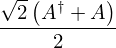

In [184]:
X = (A + Dagger(A))/sy.sqrt(2)
X

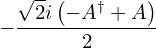

In [186]:
P = -sy.I * (A - Dagger(A))/sy.sqrt(2)
P

Let's expand the commutator $[x,p]$

In [187]:
Commutator(X, P).expand(commutator=True).expand(commutator=True)

In [ ]:
from sympy import *
x,y,z=symbols('x y z')
init_printing(use_unicode=True)
Integral(sqrt(1/x), x)

In [ ]:
simplify(sin(x)**2 + cos(x)**2)

$$
\int\sqrt{\dfrac{1}{x}}\, dx
$$

$$
\dfrac{x^3 + x^2 - x - 1}{x^2 + 2x + 1}
$$

In [ ]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

Here we see directly that the well known commutation relation for the quadratures

$[x,p]=i$

is a directly related to

$[A, A^\dagger]=1$ 

(which SymPy does not know about, and does not simplify).

In [127]:
sy.diff(sy.cos(x), x)

For more details on the quantum module in SymPy, see:

* http://docs.sympy.org/0.7.2/modules/physics/quantum/index.html
* http://nbviewer.ipython.org/urls/raw.github.com/ipython/ipython/master/docs/examples/notebooks/sympy_quantum_computing.ipynb

In [ ]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
N = Matrix([[0, 3], [0, 7]])

## Further reading

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.
* [Into to SymPy](http://www.acme.byu.edu/wp-content/uploads/2017/08/Sympy.pdf)
